Importing all the necessary modules that are required for the task

In [1]:
#Importing all the neccessary modules required for the task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical


TASK 1: EXPLORTATORY DATA ANALYSIS

In [2]:
#Loading the data into a data frame and displaying first 5 rows
df=pd.read_csv(r"dataset_aiml_task\data.csv")
print(df.head())
pixels=df.drop('label',axis=1)
labels=df['label']

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

Now its time to visualize the dataset, I will visualize dataset for each category.

1>First we will visualize the class distribution of the dataset to check if the dataset is balanaced or imbalanced.
2>Ploting random sample images of each categories
3>Calculate and display the mean image for each digit to see the average appearance of each digit.
From this three visualization we get the idea of how images of each category will look like and which part of the images varies highly from the mean and which one varies less.

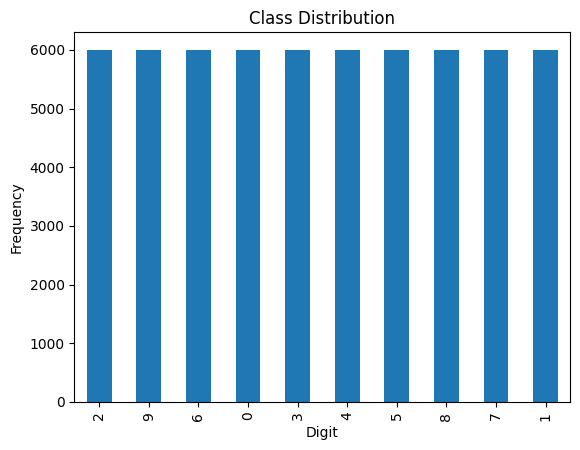

In [3]:
#Class distribution visualization
label_counts=labels.value_counts()
label_counts.plot(kind="bar")
plt.title('Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()
#From the output its clear that that the dataset is balanced


Random image for each digit category


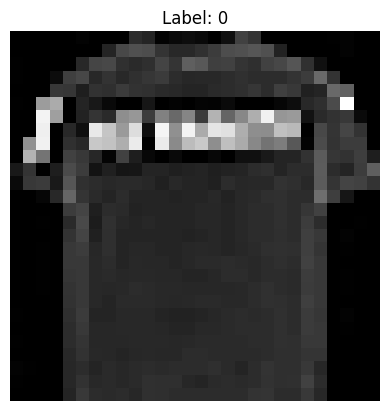

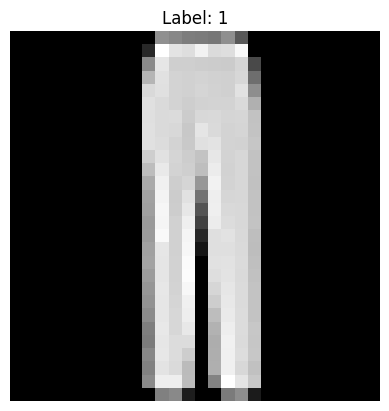

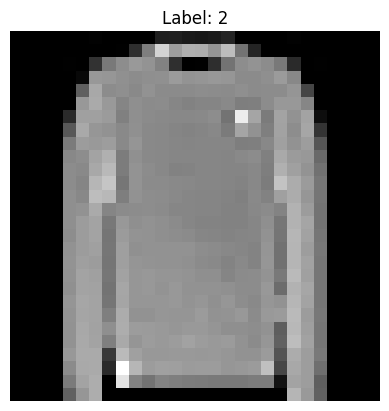

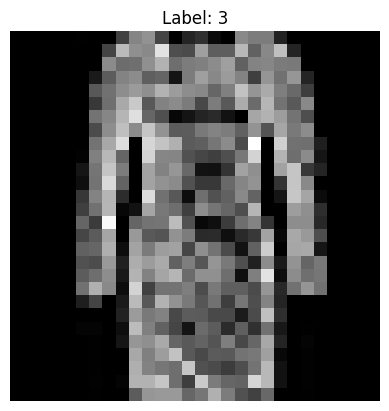

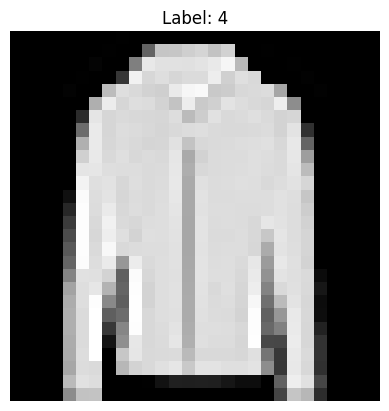

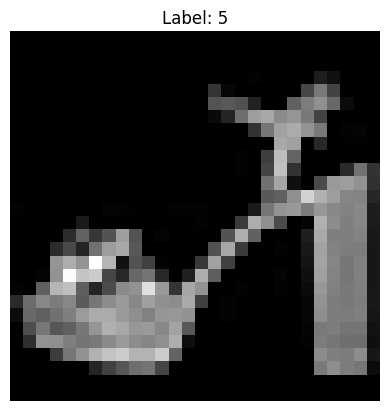

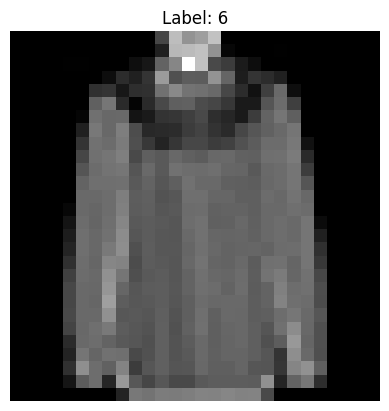

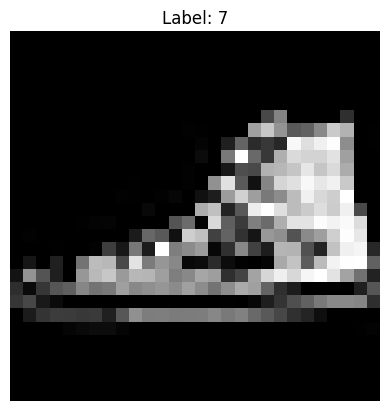

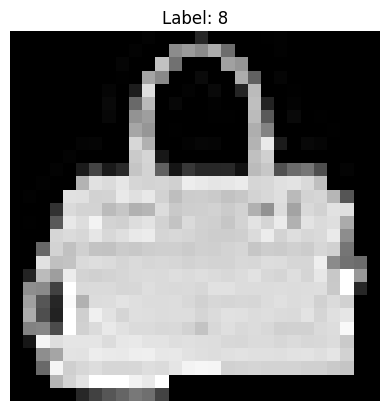

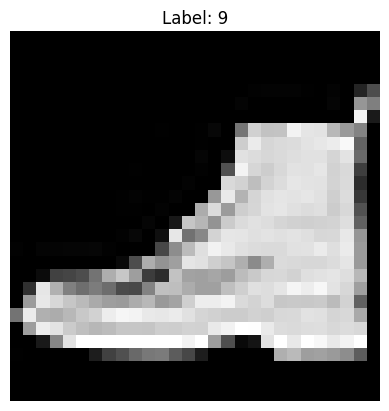

Mean image for each digit category


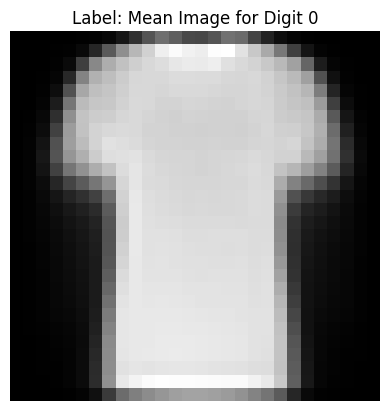

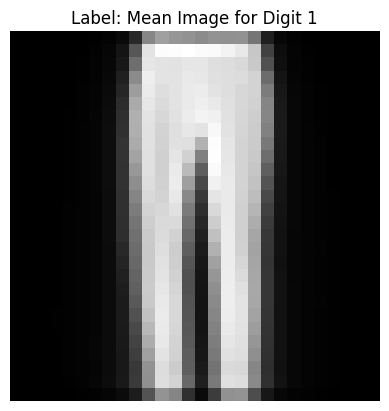

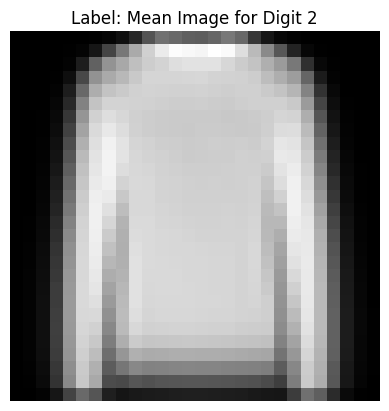

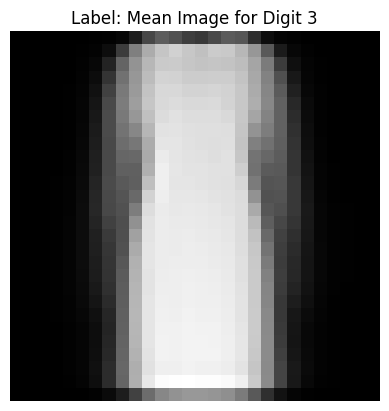

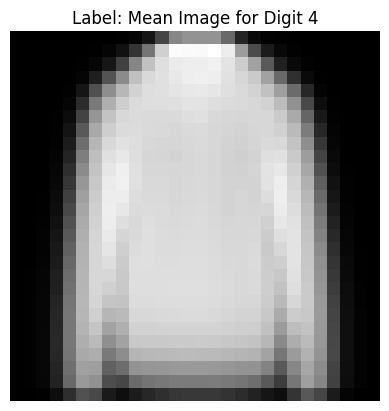

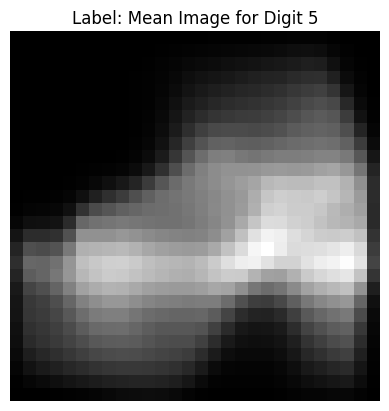

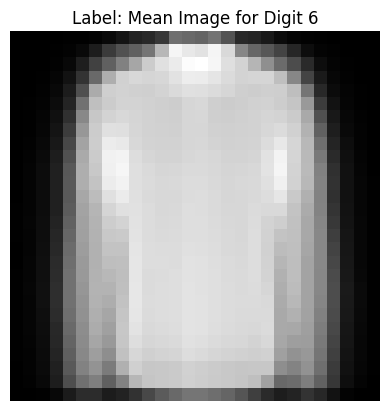

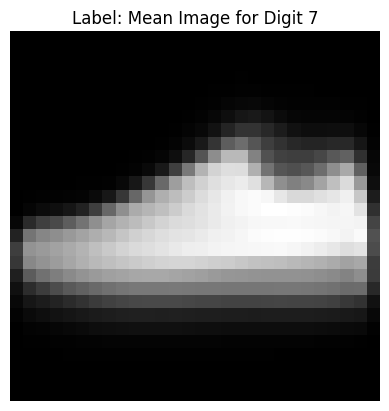

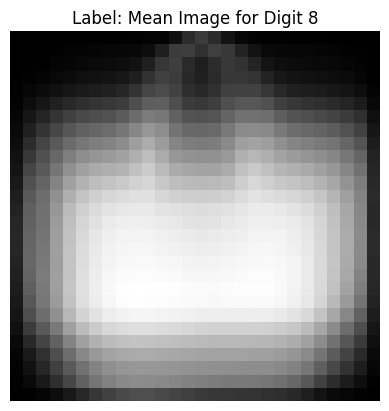

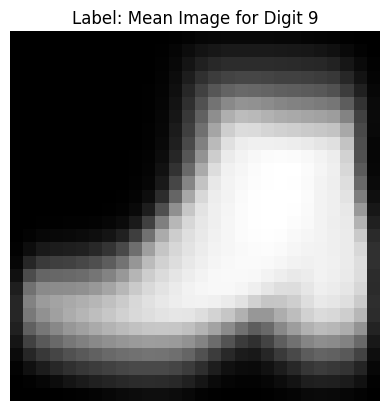

Variance image for each digit category


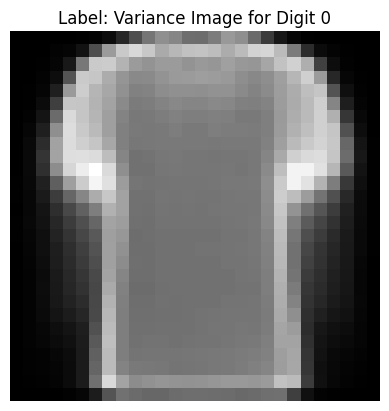

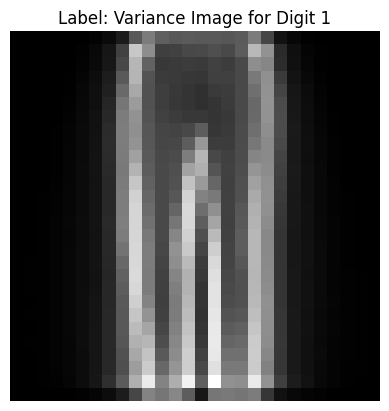

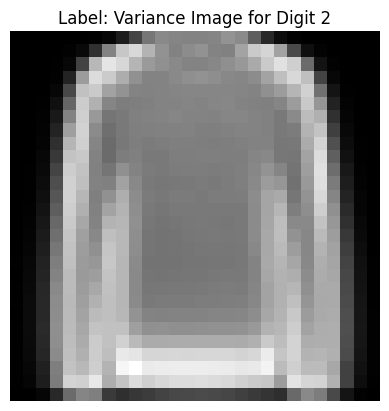

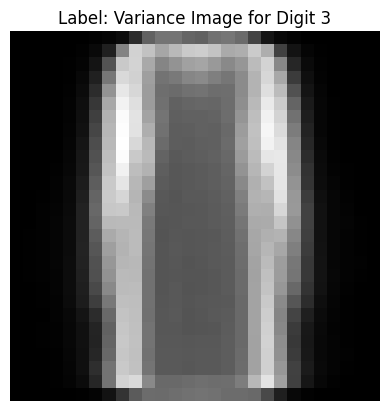

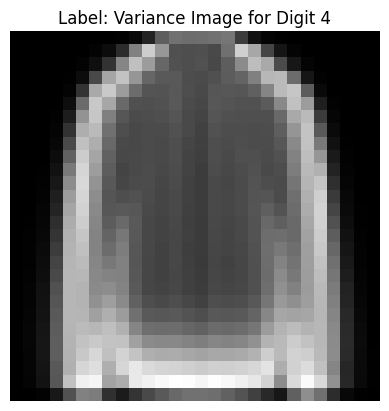

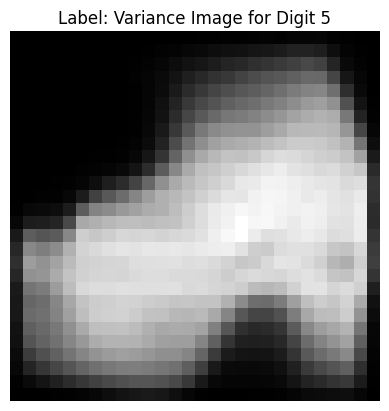

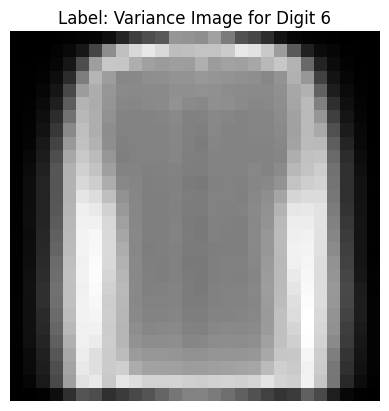

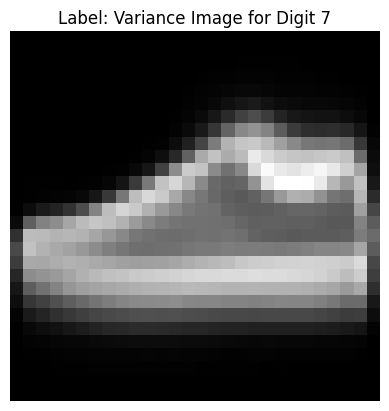

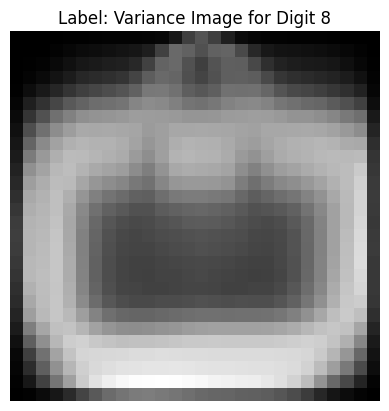

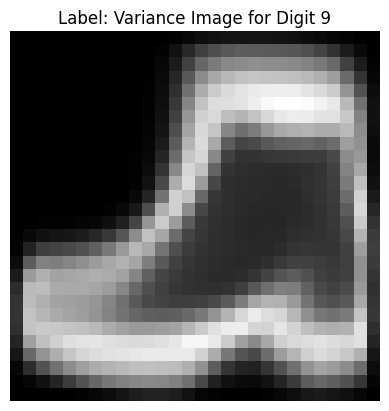

In [4]:
def show_image(image_data,label):
    plt.imshow(image_data.values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

print("Random image for each digit category")
#Displaying random sample image of each category
for digit in range(10):
    digit_data = pixels[labels == digit]
    index = np.random.randint(0, digit_data.shape[0])
    show_image(digit_data.iloc[index], digit)

print("Mean image for each digit category")
# Calculate and display the mean image for each digit category
for digit in range(10):
    digit_data = pixels[labels == digit]
    mean_image = digit_data.mean(axis=0)
    show_image(mean_image, f'Mean Image for Digit {digit}')

print("Variance image for each digit category")
# Calculate and display the variance of pixel values for each digit
for digit in range(10):
    digit_data=pixels[labels==digit]
    variance_image = digit_data.var(axis=0)
    show_image(variance_image,f'Variance Image for Digit {digit}')

Now we will generate the summary statistics for pixel values of each category to comprehend data characteristics.

In [5]:
category_summary_stats = {}
# Calculate summary statistics for each digit category (0-9)
for digit in range(10):
    digit_data = pixels[labels == digit]
    summary_stats = digit_data.describe()
    category_summary_stats[digit] = summary_stats

# Display summary statistics for each digit category
for digit, stats in category_summary_stats.items():
    print(f"Summary Statistics for Digit {digit}:")
    print(stats)
    print("\n" + "="*50 + "\n")

Summary Statistics for Digit 0:
            pixel1       pixel2       pixel3       pixel4       pixel5  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000   
mean      0.001333     0.015833     0.143833     0.332667     0.455333   
std       0.091285     0.256112     1.311017     3.805752     5.279929   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       7.000000    11.000000    78.000000   132.000000   227.000000   

            pixel6       pixel7       pixel8       pixel9      pixel10  ...  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000  ...   
mean      0.726000     1.637167     5.436333    15.324167    33.075833  ...   
std       6.979473    10.772984    20.910615    37.446964    52.

TASK 2:Basic Classification Model
After the EDA its time to develope a classifier using Logistic Regression to predict the category of clothing item.

1>We wil start with preprocessing and normalizing the data , then we will split the dataset into testing and training sets.

In [6]:
# Assuming the first column is the label and the rest are pixel values
X = df.iloc[:, 1:].values  # Features (pixel values)
y = df.iloc[:, 0].values   # Labels (digits)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to the range [0, 1]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
check=y_test
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 48000
Test set size: 12000


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Create the logistic regression model with multi_class='multinomial'
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
# Train the model on the training data
model.fit(x_train, y_train.argmax(axis=1))  # Use argmax to convert one-hot encoded labels back to integers

# Make predictions on the test data
y_pred = model.predict(x_test)
for i in range(10):
    print(y_pred[i],check[i])
# Evaluate the model
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test.argmax(axis=1), y_pred))



c:\Users\Meatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


7 7
8 8
8 8
5 5
9 9
1 1
2 2
3 6
6 6
4 2
Accuracy: 84.26%
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1232
           1       0.95      0.96      0.96      1174
           2       0.76      0.75      0.75      1200
           3       0.84      0.86      0.85      1242
           4       0.73      0.76      0.75      1185
           5       0.92      0.93      0.92      1141
           6       0.65      0.57      0.61      1243
           7       0.92      0.93      0.92      1224
           8       0.94      0.93      0.93      1149
           9       0.94      0.94      0.94      1210

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



TASK 3:Neural Network Implementation

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7807 - loss: 0.6307
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8615 - loss: 0.3903
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8781 - loss: 0.3400
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8853 - loss: 0.3157
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8885 - loss: 0.2986
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8951 - loss: 0.2814
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8989 - loss: 0.2725
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9028 - loss: 0.2597
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9062 - loss: 0.2515
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9129 - loss: 0.2366
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.9213 - loss: 0.2117

Test accuracy: 0.9209166765213013
1875/

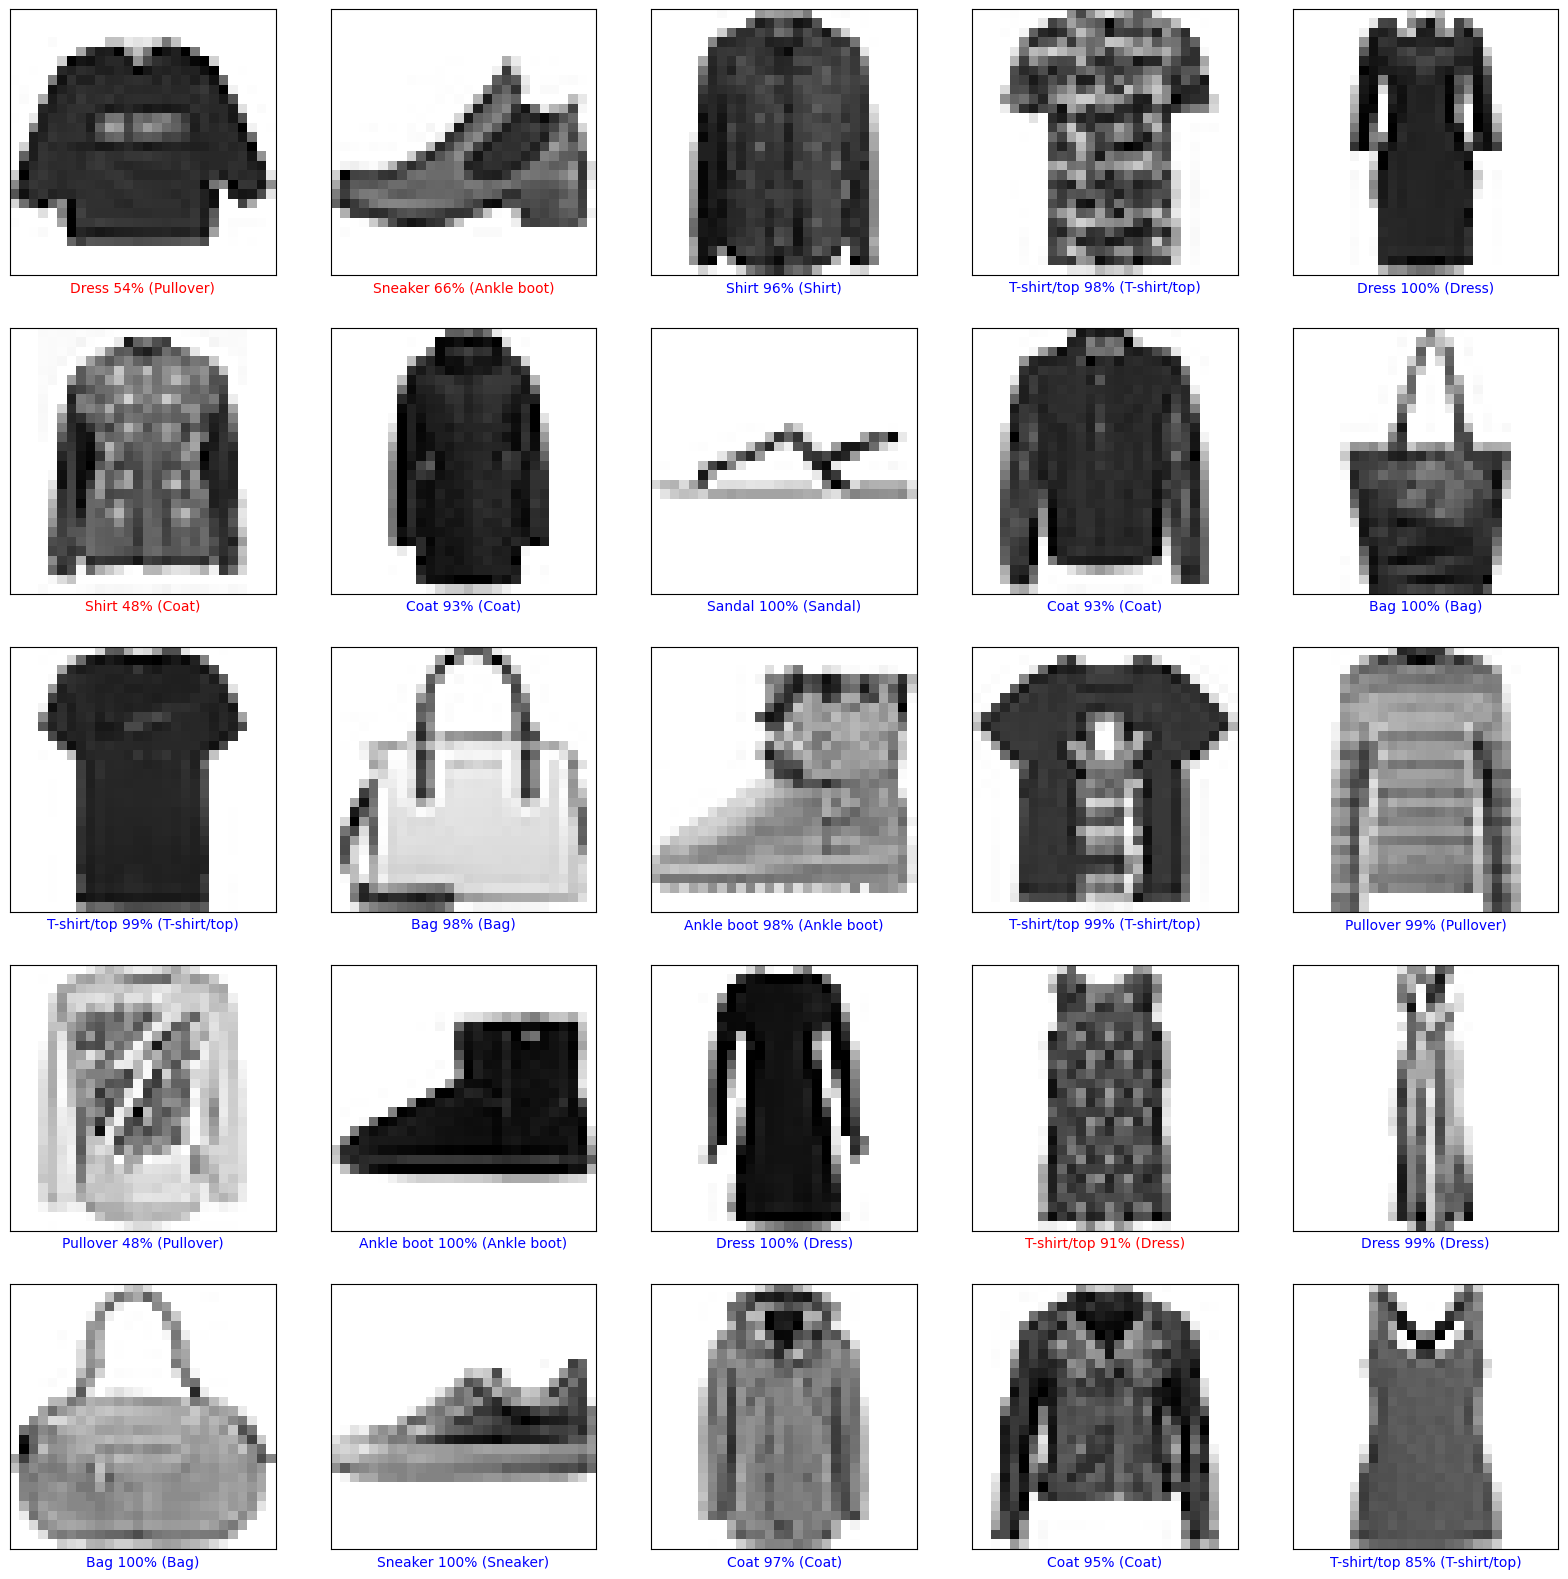

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_df = df
test_df = df

# Separate labels and features
train_labels = train_df.iloc[:, 0].values
train_images = train_df.iloc[:, 1:].values
test_labels = test_df.iloc[:, 0].values
test_images = test_df.iloc[:, 1:].values

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images
train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)

# Function to plot the image and prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.show()


